In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

past_data_cereals = pd.read_csv("../datasets/crop_data/cereals.csv", sep=";")
past_data_potatoes = pd.read_csv("../datasets/crop_data/potatoes.csv", sep=";")
cereals_2019 = pd.read_json("../json/prediction_None_lvq_svm_2019_cereals_False.json")
potatoes_2019 = pd.read_json("../json/prediction_None_lvq_lr_2019_potatoes_True.json")

In [85]:
def get_prediction(dataset, district):
    return [
        f["properties"]["classification"] 
        for feature in dataset[dataset["district"] == district]["features"] 
        for f in feature
    ][0]

def plot_figure(dataset, district_name, value_2019, color):
    year_range = list(range(2007, 2018))
    year_range.append(2019)
    
    past_data = dataset[dataset["district"] == f"District of {district_name}"].iloc[:, 11:].T
    past_data = past_data.append(pd.Series({past_data.columns[0]: value_2019}, name=2019))

    fig = plt.figure(figsize=(6,4))
    plot_2d = fig.add_subplot(111)

    plot_2d.set_xlabel("Year")
    plot_2d.set_ylabel("Yield")

    plot_2d.plot(year_range, past_data, marker="o", label=district_name, color=color)

    plot_2d.grid(True, which="major")
    plot_2d.legend()
    
    return fig

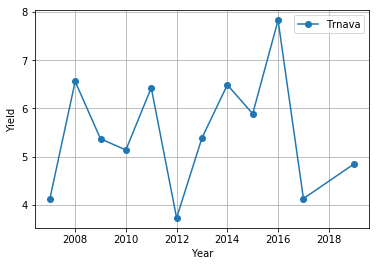

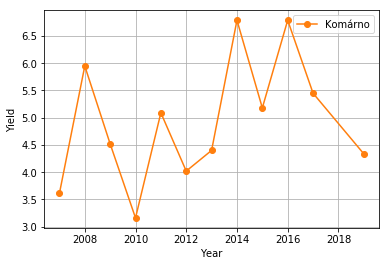

In [88]:
# cereals
for district, (yield_value, color) in {"Trnava": (get_prediction(cereals_2019, "Trnava"), "C0"), 
                                       "Komárno": (get_prediction(cereals_2019, "Komárno"), "C1")}.items():
    figure = plot_figure(past_data_cereals, district, yield_value, color)
    figure.savefig(f"pdf/timeline_cereals_{district}.pdf", 
                dpi=600,
                format="pdf", 
                facecolor="none", 
                alpha=0, 
                edgecolor="none", 
                bbox_inches="tight",
                orientation="portrait")

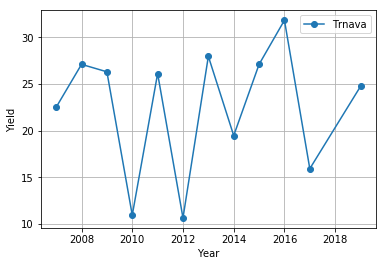

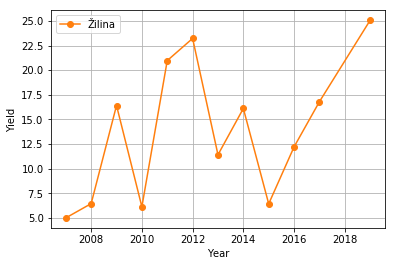

In [89]:
# potatoes
for district, (yield_value, color) in {"Trnava": (get_prediction(potatoes_2019, "Trnava"), "C0"), 
                                       "Žilina": (get_prediction(potatoes_2019, "Žilina"), "C1")}.items():
    figure = plot_figure(past_data_potatoes, district, yield_value, color)
    figure.savefig(f"pdf/timeline_potatoes_{district}.pdf", 
                    dpi=600,
                    format="pdf", 
                    facecolor="none", 
                    alpha=0, 
                    edgecolor="none", 
                    bbox_inches="tight",
                    orientation="portrait")